# Decision Tree

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

# 1.Company Dataset

In [2]:
company = pd.read_csv("C:\\Users\\91920\\Downloads\\Company_Data (1).csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
company.isna().sum()


Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:
company.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
company.corr()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [6]:
#company.Sales.unique()

In [7]:
company.groupby(['ShelveLoc','Urban','US']).count()


Sales  CompPrice  Income  Advertising  Population  Price  \
ShelveLoc Urban US                                                              
Bad       No    No      11         11      11           11          11     11   
                Yes     11         11      11           11          11     11   
          Yes   No      23         23      23           23          23     23   
                Yes     51         51      51           51          51     51   
Good      No    No       6          6       6            6           6      6   
                Yes     22         22      22           22          22     22   
          Yes   No      18         18      18           18          18     18   
                Yes     39         39      39           39          39     39   
Medium    No    No      29         29      29           29          29     29   
                Yes     39         39      39           39          39     39   
          Yes   No      55         55      55           55          55     55   
                Yes     96         96      96           96          96     96   

                     Age  Education  
ShelveLoc Urban US                   
Bad       No    No    11         11  
                Yes   11         11  
          Yes   No    23         23  
                Yes   51         51  
Good      No    No     6          6  
                Yes   22         22  
          Yes   No    18         18  
                Yes   39         39  
Medium    No    No    29         29  
                Yes   39         39  
          Yes   No    55         55  
                Yes   96         96

In [8]:
#Label Encoding

In [9]:
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 
company['Urban']= label_encoder.fit_transform(company['Urban'])
company['US']= label_encoder.fit_transform(company['US'])

In [10]:
company['ShelveLoc']=company['ShelveLoc'].astype('category')
company['Urban']=company['Urban'].astype('category')
company['US']=company['US'].astype('category')

In [11]:
company.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [12]:
type(company.ShelveLoc)


pandas.core.series.Series

In [13]:
company.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


In [14]:
colnames = list(company.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

##### Visualization

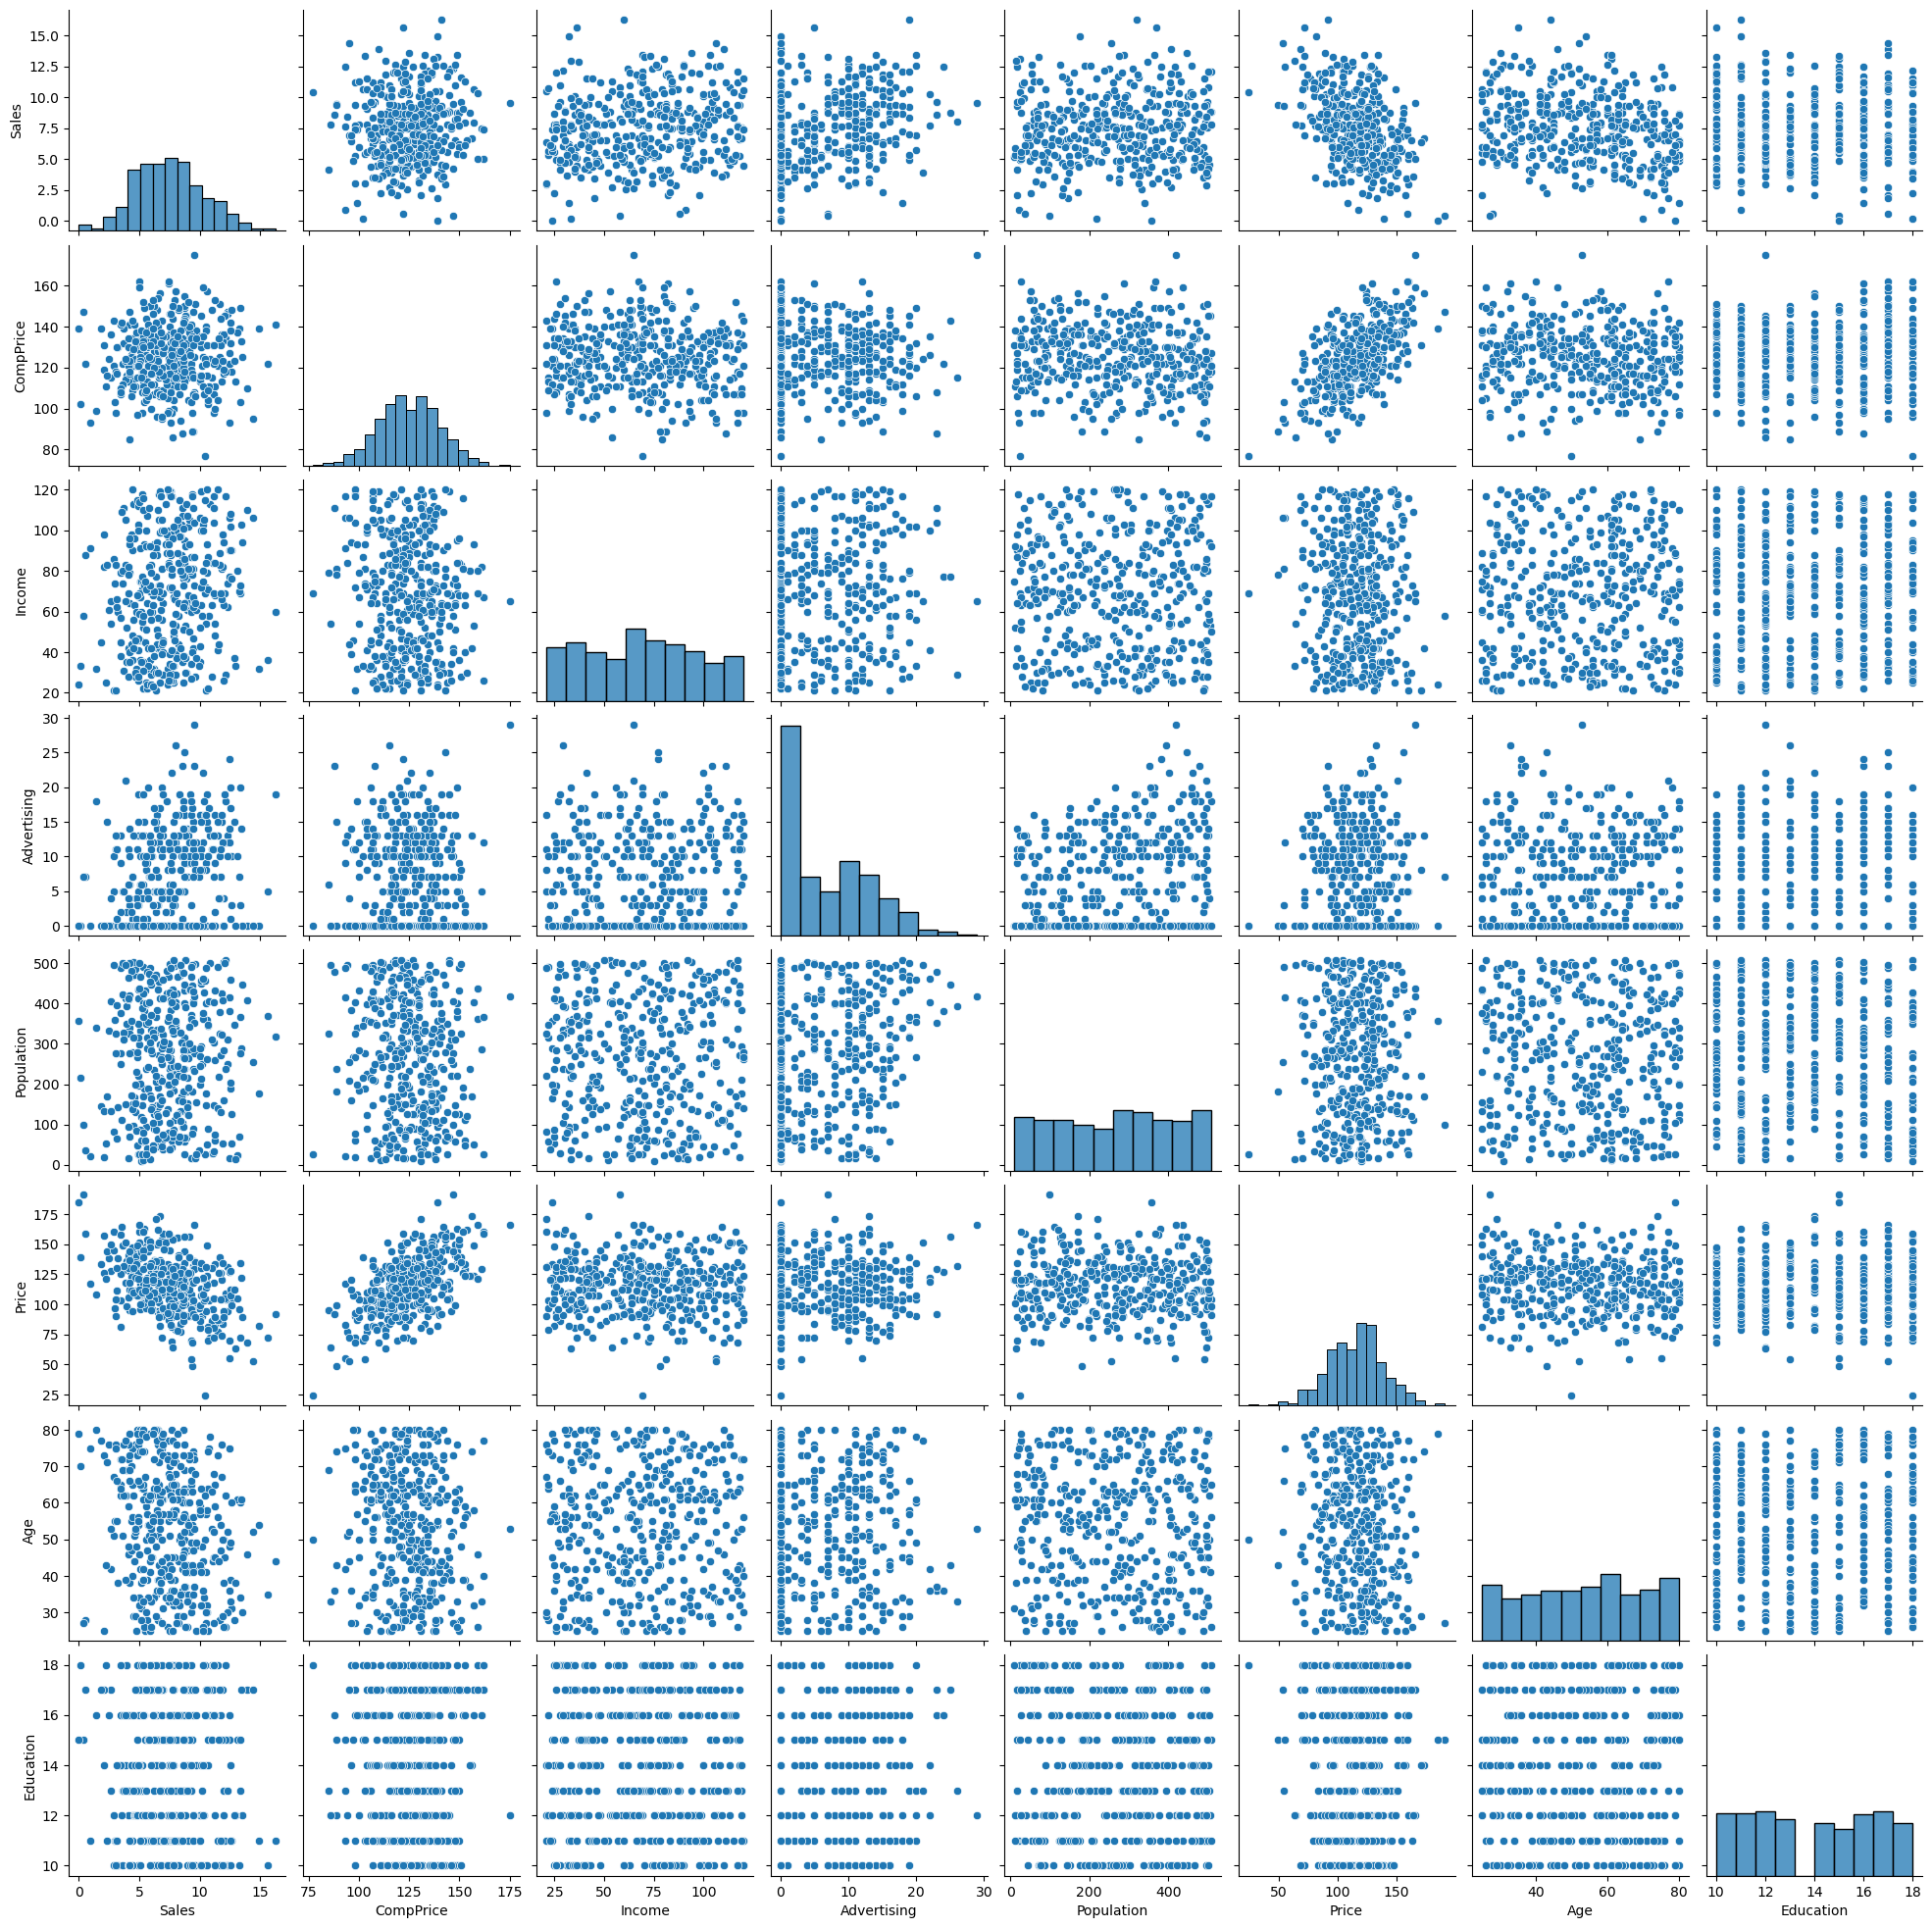

In [15]:
sns.pairplot(company)


In [16]:
#Feature Distributions: Pair plots allow you to visualize the distributions of individual features along the diagonal. You can identify if the data is normally distributed, skewed, or has multiple modes. This can help you understand the nature of your data.

#Correlation: The scatter plots off the diagonal show the relationship between pairs of features. You can look for patterns such as:

#Positive Correlation: When points slope upwards from left to right, it suggests that as one feature increases, the other tends to increase as well.
#Negative Correlation: When points slope downwards from left to right, it suggests that as one feature increases, the other tends to decrease.
#No Correlation: Scattered points with no clear trend suggest little to no linear correlation between the features.

#Outliers: Outliers can be identified as data points that fall far away from the main cluster of points in scatter plots. These points may warrant further investigation, as they can significantly impact model performance.

<Axes: xlabel='Sales', ylabel='Income'>

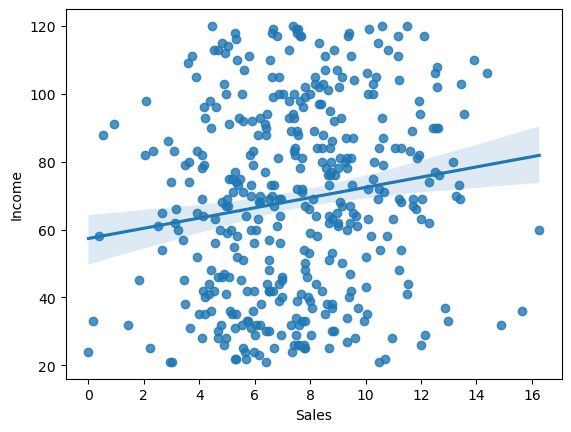

In [18]:
sns.regplot(x='Sales', y='Income', data=company)


In [19]:
#Positive Correlation: If the regression line slopes upward from left to right, it suggests a positive correlation between 'Sales' and 'Income.' In other words, as 'Sales' increase, 'Income' tends to increase as well.

#Strength of Relationship: The steepness of the regression line indicates the strength of the relationship. A steeper line suggests a stronger positive correlation.

#Outliers: Look for any data points that deviate significantly from the regression line. Outliers could indicate unusual cases where the relationship between 'Sales' and 'Income' does not follow the general trend.

<Axes: >

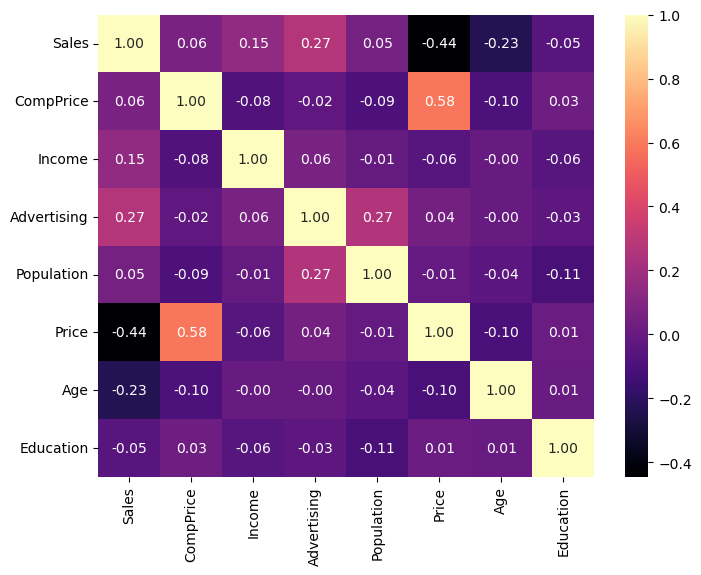

In [20]:
plt.figure(figsize = (8, 6));
sns.heatmap(company.corr(), cmap='magma', annot=True, fmt=".2f")

In [21]:
#Strength and Direction of Correlations: The colors in the heatmap represent the strength and direction of correlations between pairs of variables.

#Darker colors (closer to 1 or -1) indicate stronger correlations.

#Positive correlations are shown in lighter colors, typically ranging from yellow to red.

#Negative correlations are shown in darker colors, typically ranging from purple to blue.

#Identifying Strong Correlations: Focus on the cells that are close to 1 or -1. These indicate strong correlations. Strong positive correlations suggest that as one variable increases, the other tends to increase, and strong negative correlations suggest that as one variable increases, the other tends to decrease.

#Multicollinearity: Check for clusters of variables that are highly correlated with each other. High positive correlations between multiple pairs of variables may indicate multicollinearity, which can affect the stability and interpretability of regression models.
    
#Data Quality Issues: Unexpected or unusual correlations might indicate data quality issues, outliers, or errors in the dataset. Investigate these correlations further to ensure data integrity.    

<Axes: >

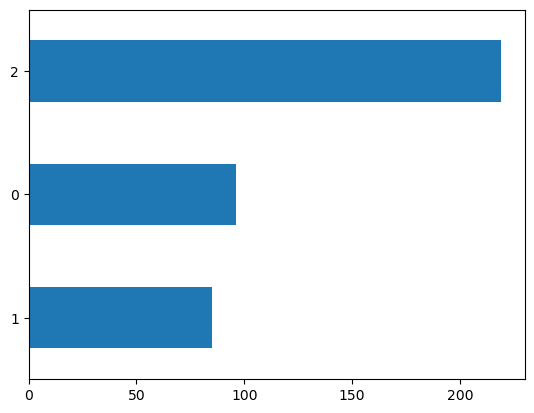

In [22]:
company.ShelveLoc.value_counts(ascending=True).plot(kind='barh')


In [23]:
#Shelf Location Distribution: The horizontal bar chart shows the distribution of different shelf locations ('ShelveLoc') in your dataset. Each bar represents a unique shelf location category.

#Frequency of Each Shelf Location: The length of each bar represents the frequency or count of products located in each shelf category. Longer bars indicate a higher number of products on that shelf.

#Popular Shelf Locations: You can quickly identify which shelf locations are the most popular or common based on the tallest bars in the chart. These are the shelf locations where you have the most products.

#Less Common Shelf Locations: Conversely, the shortest bars represent less common or even rare shelf locations. Identifying these less common locations may be useful for inventory management or marketing strategies.

#Potential Insights for Marketing: The distribution of products across different shelf locations can offer insights for marketing decisions. For example, if you have a shelf location that is underutilized but has the potential for more visibility, you might consider strategies to promote products in that area.

In [24]:
#x=company.drop(['Sales'], axis=1)
#y=company[['Sales']]
#x.head()

In [26]:
import ppscore as pps
pps.matrix(company)        #calculate the whole PPS matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Sales,Sales,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Sales,CompPrice,0.000000,regression,True,mean absolute error,12.215000,17.223333,DecisionTreeRegressor()
2,Sales,Income,0.000000,regression,True,mean absolute error,23.632500,30.317083,DecisionTreeRegressor()
3,Sales,Advertising,0.000000,regression,True,mean absolute error,5.730000,6.332500,DecisionTreeRegressor()
4,Sales,Population,0.000000,regression,True,mean absolute error,127.045000,165.681250,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
116,US,ShelveLoc,0.000017,classification,True,weighted F1,0.387407,0.387417,DecisionTreeClassifier()
117,US,Age,0.000000,regression,True,mean absolute error,13.877500,13.956625,DecisionTreeRegressor()
118,US,Education,0.000000,regression,True,mean absolute error,2.285000,2.304601,DecisionTreeRegressor()
119,US,Urban,0.000000,classification,True,weighted F1,0.600000,0.583031,DecisionTreeClassifier()


In [27]:
pps.score(company, x="Sales", y="Income")


{'x': 'Sales',
 'y': 'Income',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 23.6325,
 'model_score': 30.317083333333333,
 'model': DecisionTreeRegressor()}

#### For continous variable we can't use classifier i.e. we are going to use Regressor for this dataset


## Decision Tree Regression

In [28]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [29]:
array = company.values
X = array[:,1:11]
y = array[:,0]
y

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,
        5.52, 12.61,  6.2 ,  8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,
        7.52, 11.62,  4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,  7.95,
        5.33,  4.81,  4.53,  8.86,  8.39,  5.58,  9.48,  7.45, 12.49,
        4.88,  4.11,  6.2 ,  5.3 ,  5.07,  4.62,  5.55,  0.16,  8.55,
        3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,  8.54,  5.08,
        8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,  9.34,
       11.27,  6.52,

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [31]:
model0 = DecisionTreeRegressor()
model0.fit(X_train, y_train)

DecisionTreeRegressor()

In [33]:
model0.score(X_test,y_test)           #Accuracy


0.23174260667489177

## 2.Fraud Check Dataset

In [35]:
fraud = pd.read_csv("C:\\Users\\91920\\Downloads\\Fraud_check (1).csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [36]:
f_c1 = fraud.drop(['City.Population'], axis = 1)
f_c1

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,NO,Single,68833,10,YES
1,YES,Divorced,33700,18,YES
2,NO,Married,36925,30,YES
3,YES,Single,50190,15,YES
4,NO,Married,81002,28,NO
...,...,...,...,...,...
595,YES,Divorced,76340,7,YES
596,YES,Divorced,69967,2,YES
597,NO,Divorced,47334,0,YES
598,YES,Married,98592,17,NO


In [37]:
f_c1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
dtypes: int64(2), object(3)
memory usage: 23.6+ KB


#### We need to add target column for risky or not, according to the given problem statement

In [38]:
y1=np.empty(600, dtype=object)
i=0

for value in f_c1['Taxable.Income']:
    if value<=30000:
        y1[i]='Risky'
    else:
        y1[i]='Good'
    i=i+1    

In [39]:
y1

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [40]:
t1=pd.DataFrame(y1,columns=['Target'])
t1

,Target
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [41]:
f_c = pd.concat([f_c1,t1],axis=1)
f_c.head()


,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Target
0,NO,Single,68833,10,YES,Good
1,YES,Divorced,33700,18,YES,Good
2,NO,Married,36925,30,YES,Good
3,YES,Single,50190,15,YES,Good
4,NO,Married,81002,28,NO,Good


In [42]:
f_c.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
Work.Experience    0
Urban              0
Target             0
dtype: int64

In [43]:
f_c.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   Target           600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.3+ KB


In [44]:
f_c.corr()


,Taxable.Income,Work.Experience
Taxable.Income,1.000000,-0.001818
Work.Experience,-0.001818,1.000000


In [45]:
f_c.groupby(['Undergrad', 'Marital.Status' ,'Urban']).count()


Taxable.Income  Work.Experience  Target
Undergrad Marital.Status Urban                                         
NO        Divorced       NO                 53               53      53
                         YES                44               44      44
          Married        NO                 44               44      44
                         YES                47               47      47
          Single         NO                 46               46      46
                         YES                54               54      54
YES       Divorced       NO                 50               50      50
                         YES                42               42      42
          Married        NO                 50               50      50
                         YES                53               53      53
          Single         NO                 55               55      55
                         YES                62               62      62

### Label Encoding

In [46]:
label_encoder = preprocessing.LabelEncoder()
f_c['Undergrad']= label_encoder.fit_transform(f_c['Undergrad'])
f_c['Marital.Status']= label_encoder.fit_transform(f_c['Marital.Status'])
f_c['Urban']= label_encoder.fit_transform(f_c['Urban'])
f_c['Target']= label_encoder.fit_transform(f_c['Target'])

In [47]:
f_c.head()


,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Target
0,0,2,68833,10,1,0
1,1,0,33700,18,1,0
2,0,1,36925,30,1,0
3,1,2,50190,15,1,0
4,0,1,81002,28,0,0


In [48]:
f_c.Target.value_counts()


0    476
1    124
Name: Target, dtype: int64

In [49]:
colnames = list(f_c.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'Work.Experience',
 'Urban',
 'Target']

### Visualization

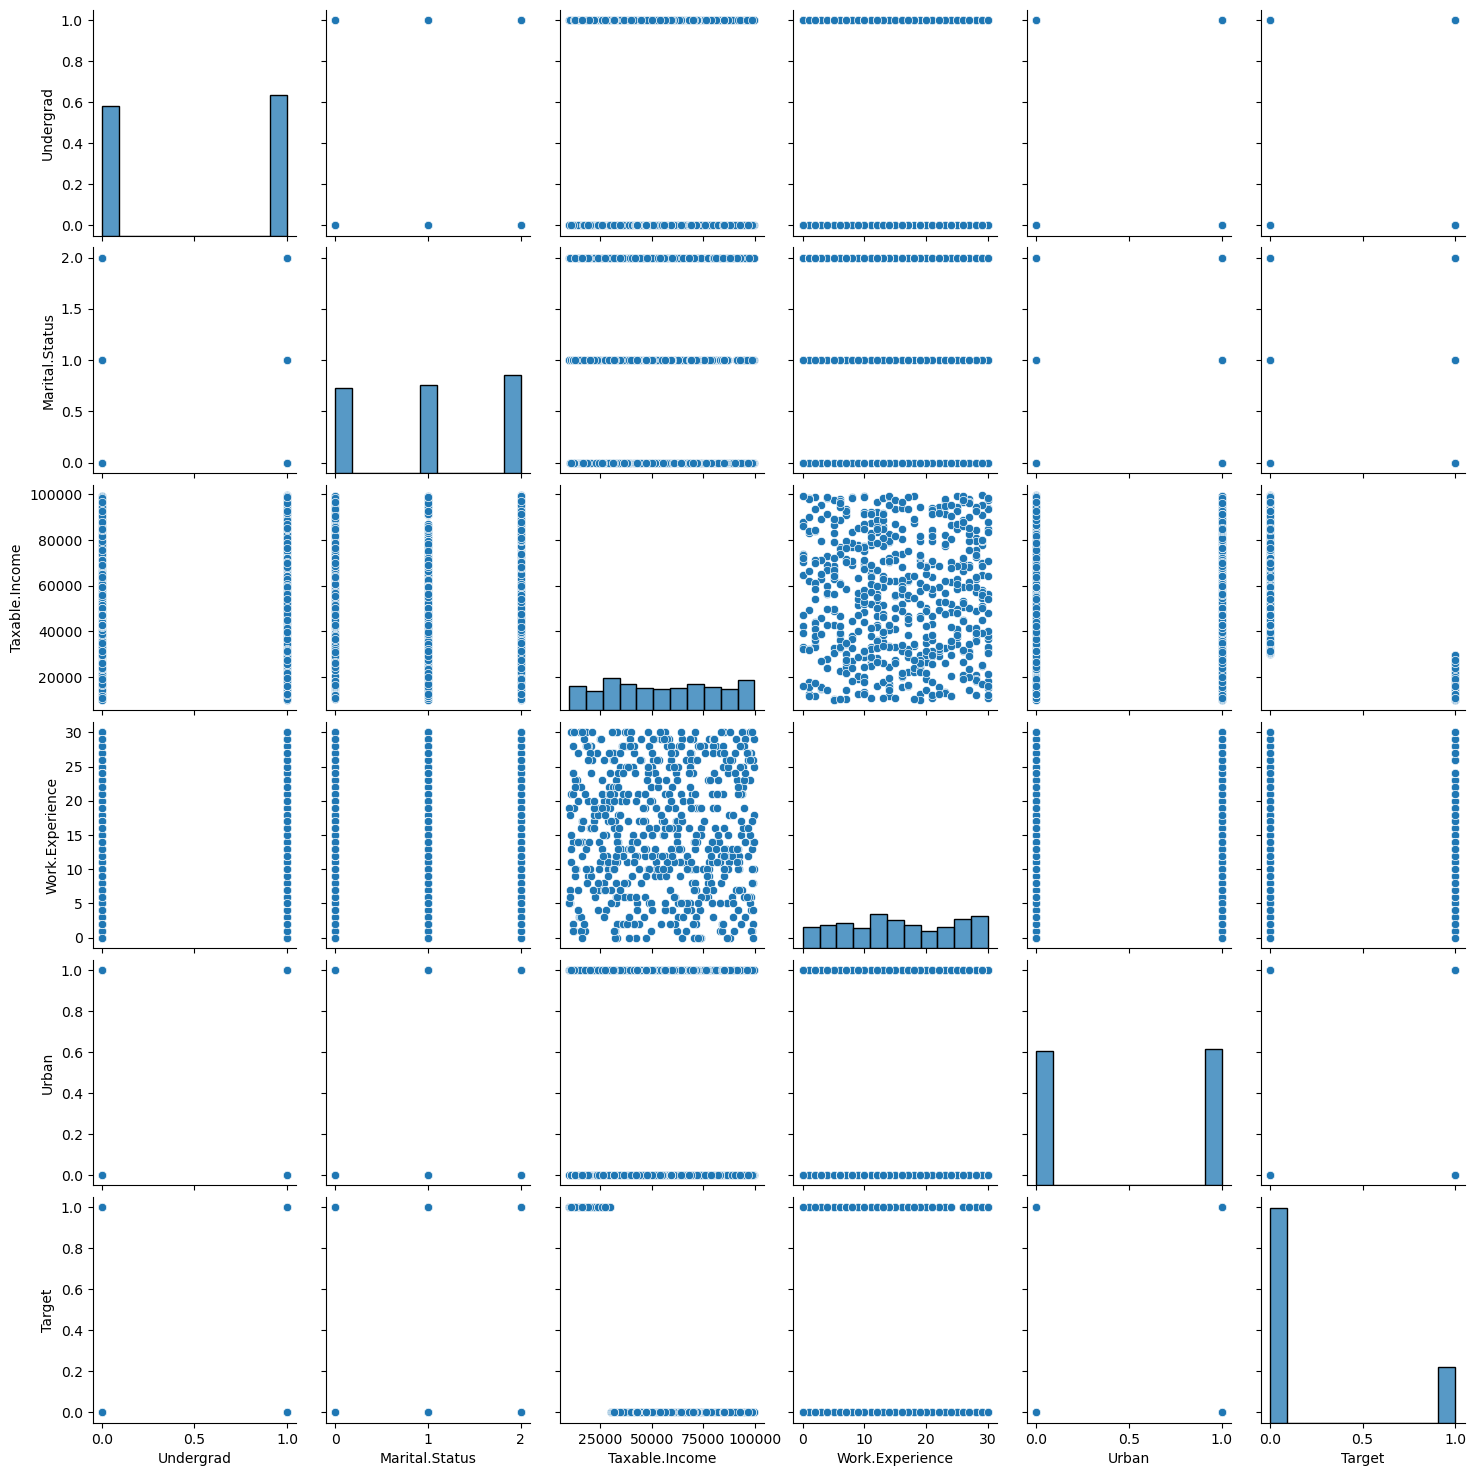

In [50]:
sns.pairplot(f_c)


In [51]:
#Feature Relationships: The pair plot will show scatterplots for each pair of numeric features in your dataset. You can identify relationships between features. For example, if there's a positive correlation between two variables, you might observe a diagonal line of points sloping upward from left to right.

#Distribution of Data: The diagonal plots represent the distribution of individual variables. You can assess whether your variables follow normal distributions, are skewed, or have multiple modes.

#Outliers: Outliers may be visible as individual data points that are far away from the main clusters in scatterplots. These outliers can be important to identify, as they may affect the performance of machine learning models.

#Classification Insights: Since you've created a classification ('Risky' or 'Good') based on 'Taxable.Income,' you can observe how this classification relates to other variables. Are there patterns that distinguish 'Risky' from 'Good' individuals based on other features in the dataset?

#Feature Importance: If you're interested in predictive modeling, you can visually assess which features seem to be more important for classifying individuals as 'Risky' or 'Good.'

<Axes: xlabel='Taxable.Income', ylabel='Density'>

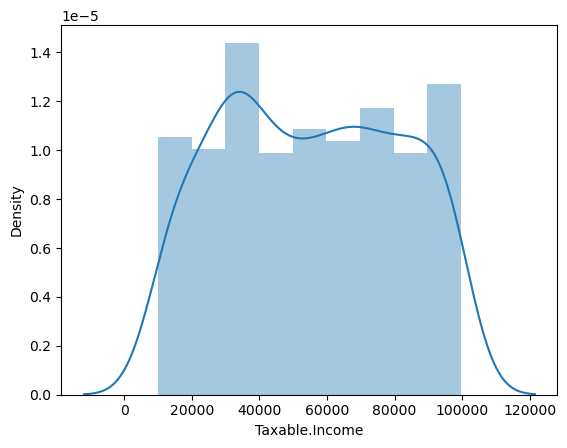

In [52]:
sns.distplot(f_c['Taxable.Income'])


In [54]:
#Distribution Shape: The distribution plot shows the shape of the 'Taxable.Income' data. It can help you identify whether the data follows a particular distribution pattern. Common distributions include normal (bell-shaped), skewed (either positively or negatively), and multimodal (multiple peaks).

#Central Tendency: Look at the central point of the distribution, which is typically represented by the peak or mode. This point can provide insight into the typical or central value of taxable income in your dataset.

#Spread and Variability: The width and spread of the distribution can indicate the variability in taxable income. A wider distribution suggests greater variability among individuals or cases.

#Skewness: Check whether the distribution is skewed to the left (negatively skewed) or right (positively skewed). A skewed distribution may have implications for analysis and modeling, as it can affect mean, median, and assumptions of normality.

#Outliers: Look for any data points that fall far from the main body of the distribution. Outliers, if present, may be evident as individual data points that are significantly distant from the central portion of the plot.

<Axes: xlabel='Work.Experience', ylabel='Density'>

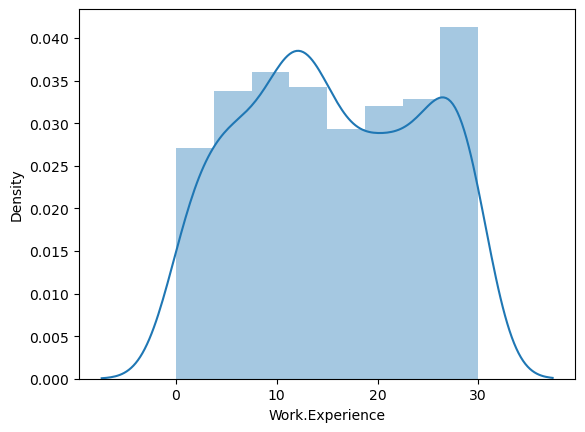

In [55]:
sns.distplot(f_c['Work.Experience'])


In [56]:
#Distribution Shape: The distribution plot shows the shape of the 'Work.Experience' data. It can help you identify whether the data follows a particular distribution pattern. Common distribution shapes include normal (bell-shaped), skewed (either positively or negatively), and multimodal (multiple peaks).

#Central Tendency: Examine the central point of the distribution, which is typically represented by the peak or mode. This point can provide insight into the typical or central amount of work experience among the individuals in your dataset.

#Spread and Variability: The width and spread of the distribution can indicate the variability in work experience. A wider distribution suggests greater variability among individuals in terms of their work experience.

#Skewness: Check whether the distribution is skewed to the left (negatively skewed) or right (positively skewed). Skewness can provide information about the direction in which most individuals' work experience tends to deviate from the mean.

#Outliers: Look for any data points that fall far from the main body of the distribution. Outliers, if present, may indicate unusual or extreme cases in terms of work experience.

<Axes: >

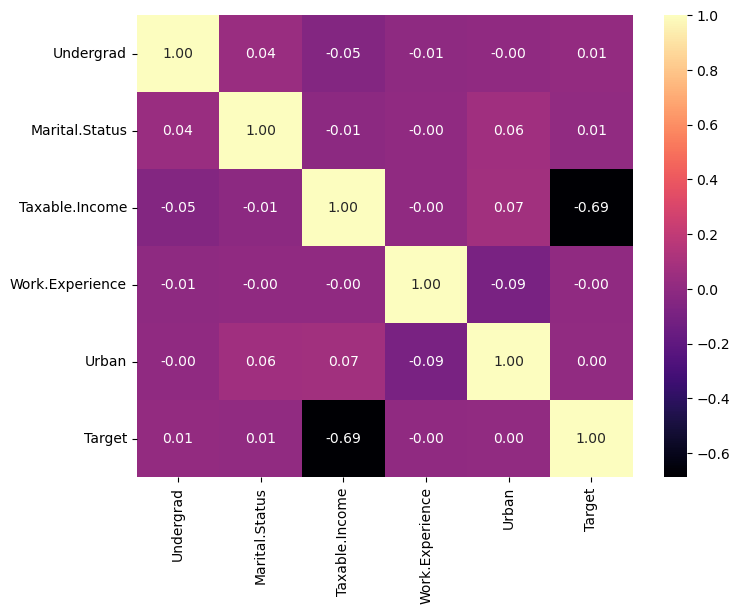

In [57]:
plt.figure(figsize = (8, 6));
sns.heatmap(f_c.corr(), cmap='magma', annot=True, fmt=".2f")

In [58]:
#Strength and Direction of Correlations: The colors in the heatmap represent the strength and direction of correlations between pairs of variables.

#Darker colors (closer to 1 or -1) indicate stronger correlations.
#Positive correlations are shown in lighter colors (typically ranging from yellow to red).
#Negative correlations are shown in darker colors (typically ranging from purple to blue).
#Identifying Strong Correlations: Focus on the cells that are close to 1 or -1. These indicate strong correlations. Strong positive correlations suggest that as one variable increases, the other tends to increase, and strong negative correlations suggest that as one variable increases, the other tends to decrease.

#Multicollinearity: Check for clusters of variables that are highly correlated with each other. High positive correlations between multiple pairs of variables may indicate multicollinearity, which can affect the stability and interpretability of regression models.

<Axes: xlabel='Taxable.Income', ylabel='Work.Experience'>

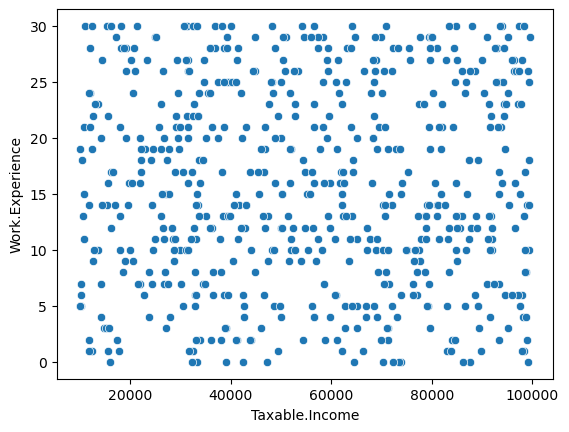

In [59]:
sns.scatterplot(x = 'Taxable.Income', y = 'Work.Experience', data = f_c)


In [60]:
#Relationship Type: The scatter plot can help you determine the type of relationship between 'Taxable.Income' and 'Work.Experience.'

#Positive Linear Relationship: If the points generally form an upward-sloping pattern from left to right, it suggests a positive linear relationship. As 'Work.Experience' increases, 'Taxable.Income' tends to increase.

#Negative Linear Relationship: If the points form a downward-sloping pattern, it suggests a negative linear relationship. As 'Work.Experience' increases, 'Taxable.Income' tends to decrease.

#No Clear Relationship: If the points are scattered without a clear trend, it suggests no strong linear relationship between the two variables.

#Outliers: Look for data points that are far from the main cluster of points. Outliers may be evident as individual data points that deviate significantly from the general trend. These outliers could represent unusual cases in your dataset.

In [61]:
x=f_c.iloc[:,0:5]
y=f_c[['Target']]
x.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,0,2,68833,10,1
1,1,0,33700,18,1
2,0,1,36925,30,1
3,1,2,50190,15,1
4,0,1,81002,28,0


In [62]:
y.tail()


,Target
595,0
596,0
597,0
598,0
599,0


### Building Decision Tree Classifier using Entropy Criteria

In [63]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=32)

In [64]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [66]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

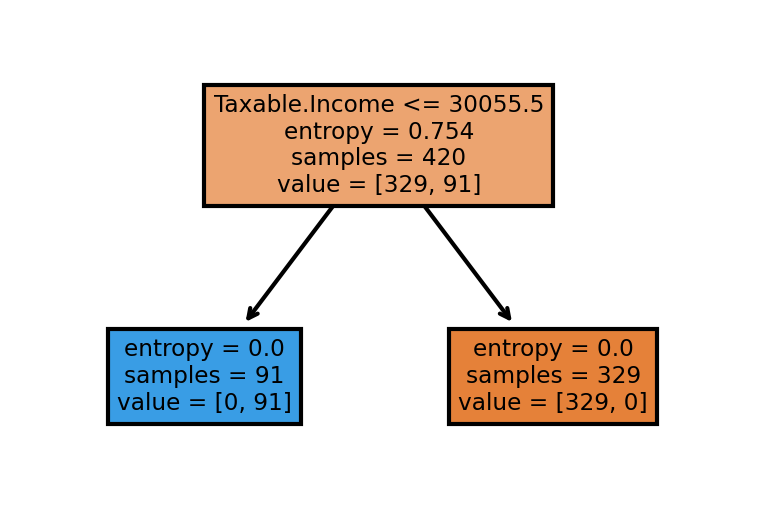

In [67]:
fn=['Undergrad', 'Marital.Status', 'Taxable.Income', 'Work.Experience', 'Urban']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(model2,
               feature_names = fn, 
               #class_names=cn,
               filled = True);

In [70]:
#Feature Importance: By looking at the decision tree structure, you can gain insights into which features are most important in making decisions. Features that appear closer to the root node or higher up in the tree tend to have a more significant impact on the model's predictions.

#Decision Rules: You can interpret the decision rules at each node of the tree. For example, if the tree splits on 'Taxable.Income' <= X at a particular node, it means that this income threshold is crucial for decision-making.

#Hierarchy of Features: The tree structure represents a hierarchy of features, showing how they are used in combination to classify or predict outcomes.

#Node Purity: Decision trees aim to create pure nodes, meaning that most of the data points in a node belong to one class (in a classification task) or have similar values (in a regression task). You can assess the purity of nodes and identify where splits occur to improve model performance.

#Tree Depth: The depth of the tree can indicate the complexity of the model. Shallower trees are simpler, while deeper trees are more complex and may be prone to overfitting.

#Pruning: Decision trees can sometimes be pruned to reduce complexity and improve generalization. You can look for nodes with low impurity or low importance that may be candidates for pruning.

#Predictive Power: You can assess how well the decision tree predicts the target variable by following a path from the root node to a leaf node and observing the predicted class or value.

#Visual Inspection: Visualizing the tree can be a useful tool for explaining model decisions to non-technical stakeholders. It provides a transparent and interpretable representation of the decision-making process.

In [71]:
preds2 = model2.predict(x_test)
pd.Series(preds2).value_counts()

0    147
1     33
dtype: int64

In [72]:
preds2

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0])

In [73]:
y_test


,Target
312,0
174,0
51,0
186,0
223,0
...,...
240,0
540,1
13,0
101,0


In [74]:
y_test2 = y_test.to_numpy()
y_test2 = np.reshape(y_test2, 180)
y_test2

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0])

In [75]:
pd.crosstab(y_test2,preds2) # getting the 2 way table to understand the correct and wrong predictions


col_0,0,1
row_0,,
0,147,0
1,0,33


### Building Decision Tree Classifier (CART) using Gini Criteria

In [76]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.22,random_state=18)


In [77]:
from sklearn.tree import DecisionTreeClassifier
model2_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [78]:
model2_gini.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [79]:
y_test


,Target
129,0
533,1
473,0
401,0
221,0
...,...
568,0
217,0
186,0
562,0


In [80]:
y_test3 = y_test.to_numpy()
y_test3 = np.reshape(y_test3, 132)
y_test3

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1])

In [81]:
#Prediction and computing the accuracy
pred=model2.predict(x_test)
np.mean(pred==y_test3)

1.0

### Decision Tree Regression Example

In [82]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [83]:
array = f_c.values
X = array[:,0:5]
y = array[:,-1]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [85]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [86]:
model.score(X_test,y_test)           #Accuracy

1.0